# Data wrangling

## W tym rozdziale

Ogromna część analizy danych obejmuje **czyszczenie, porządkowanie i naprawianie** danych. 

W niedawnym artykule z New York Timesa napisano: 
>  „Naukowcy zajmujący się danymi, według wywiadów i szacunków ekspertów, spędzają od 50 do 80 procent swojego czasu na przyziemnej pracy związanej z gromadzeniem i przygotowywaniem danych, zanim będzie można je zbadać pod kątem przydatnych informacji”.

**Jak?**

- dostrzegać zmienne i obserwacje w danych
- szybko uzyskiwać nowe zmienne i obserwacje do zbadania
- przekształcać dane w układ, który najlepiej sprawdza się w Pythonie
- łączyć ze sobą wiele zestawów danych
- używać podsumowań grupowych do odkrywania ukrytych poziomów informacji w danych

Można by poświęcić temu cały kurs, ale dzisiaj skupimy się na tym:

- Czym jest **data wrangling**? 
- Co zrobić z **brakującymi wartościami**?
- Co zrobić z **brudnymi danymi**?
- Jak **łączyć** zbiory danych?
- **Porządkowanie danych**!
   - Co to jest?
   - Jak sprawić, by *nasze* dane były uporządkowane?

In [25]:
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Czym jest data wrangling?

**Data wrangling** odnosi się do *manipulowania*, *reshapingu* lub *przekształcania* zbioru danych w zależności od potrzeb (np. wizualizacji i/lub analizy).

- Ogromna część pracy z danymi obejmuje „manipulowanie”.
- Obejmuje to:
   - „Czyszczenie” danych (brakujące wartości, przekształcanie zmiennych itp.). 
   - Scalanie/łączenie różnych zestawów danych.
   - Przekształcanie danych w razie potrzeby.

### Data Wrangling z Pandas

**CHEAT-SHEET** dostępny jest [tutaj](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

<iframe width="560" height="315" src="https://www.youtube.com/embed/x0Sy6Kl0Mzw?si=BXGWrzrH_6690Jlf" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Radzenie sobie z *brakującymi wartościami*

- W praktyce, **rzeczywiste** dane są często nieuporządkowane.  
- Obejmuje to **brakujące wartości**, które przyjmują wartość/etykietę `NaN`.
   - `NaN` = „Not a Number”.
- [Radzenie sobie z wartościami `NaN` jest jednym z głównych wyzwań w SAD!](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

## Rodzaje braków danych

Zanim zaczniemy analizować brakujące wartości, ważne jest, aby zrozumieć różne przyczyny braku danych. Ogólnie rzecz biorąc, mogą istnieć trzy możliwe powody:

**1. Brak całkowicie losowy (MCAR)**.

>Brakujące wartości danej zmiennej (Y) nie są powiązane z innymi zmiennymi w danym zestawie danych lub z samą zmienną (Y). Innymi słowy, nie ma konkretnego powodu dla brakujących wartości.

**2. Braki losowe (MAR)**.

>MAR występuje, gdy brak nie jest losowy, ale gdy brak może być w pełni wyjaśniony przez zmienne, o których istnieją pełne informacje.

**3. Braki nielosowe (MNAR)**.
>Braki zależą od nieobserwowanych danych lub wartości samych brakujących danych. 

### MCAR

**Co to oznacza?** Gdy brakujące punkty danych nie są zgodne z żadnym konkretnym rozumowaniem lub wzorcem. Na przykład masz dane demograficzne mieszkańców swojej społeczności. Ale w zmiennej „Drugie imię” brakuje 50% wartości. Te 50% danych jest doskonałym przykładem MCAR danych. Nie ma wzorca ani konkretnego powodu, dla którego drugie imię jest puste w większości wpisów.

**Jak sobie z tym poradzić?**

W przypadku MCAR danych można zastosować następujące metody:

1. Usuwanie wierszami: Usunięcie rekordu, jeśli w zbiorze danych brakuje danych w którejkolwiek ze zmiennych/kolumn. Działa to najlepiej tylko wtedy, gdy liczba brakujących danych jest niewielka, na przykład gdy w zbiorze danych brakuje tylko 2% danych całkowicie losowo.
2. Usuwanie parami: Usuwanie parami usuwa tylko przypadki, w których brakuje jednej ze zmiennych używanych w rozważanej metodzie statystycznej. Działa na tej samej zasadzie co macierz korelacji. W przypadku brakujących wartości między dwiema zmiennymi (w sensie parami) znalezienie macierzy korelacji uwzględnia wszystkie pełne przypadki dla tych dwóch zmiennych. Załóżmy, że liczba przypadków w tym scenariuszu wynosi N. Po pobraniu innego zestawu zmiennych i obliczeniu macierzy korelacji liczba kompletnych przypadków będzie różnić się od N. Służy to jako główna różnica między usuwaniem wierszami i parami. Usuwanie parami ma tę zaletę, że powoduje minimalną utratę danych. W przypadku zbioru danych, który ma powszechne brakujące wartości w prawie wszystkich zmiennych, usuwanie parami byłoby mądrzejszym wyborem radzenia sobie z brakującymi wartościami.
3. Średnia, mediana i imputacja trybu: Brakujące wartości można również zastąpić średnią, medianą i modą odpowiednich zmiennych.


### MAR

**Co to oznacza?** Gdy brakujące punkty danych podążają za wzorcem. Weźmy ten sam przykład danych demograficznych mieszkańców Twojej społeczności. Ale tym razem brakuje wynagrodzenia kilku mężczyzn w wieku powyżej 45 lat.

W tym przypadku brak danych jest przypisany do danych innej zmiennej. W związku z tym jest to mechanizm „missing at random”. MAR jest prawdopodobnie najtrudniejszy do zrozumienia ze względu na swoją nazwę.

**Jak sobie z nim radzić?**

Ponieważ w tym mechanizmie występuje związek, najlepszą opcją byłoby zastosowanie techniki imputacji - średniej, mediany, trybu lub wielokrotnej imputacji.


### MNAR

**Co to oznacza?**

Gdy brakujące punkty danych są zgodne z wzorcem, oznacza to, że są one zgodne z mechanizmem MNAR. Na przykład, w tych samych danych demograficznych mieszkańców Twojej społeczności, powiedzmy, że brakuje wynagrodzenia kilku mężczyzn, gdy wynagrodzenie przekracza określoną kwotę. (powiedzmy milion)

W tym przypadku mamy do czynienia z mechanizmem „Missing Not at Random”. Zazwyczaj, gdy brakujące dane nie są MCAR lub MAR, mają tendencję do naśladowania MNAR.

**Jak sobie z tym poradzić?**

Ponieważ w przypadku MNAR występuje zależność indukowana przez samą siebie, najlepszym sposobem na uniknięcie jej jest gromadzenie danych lub modelowanie brakujących danych.

Powodem, dla którego musimy przeanalizować mechanizmy brakujących wartości, jest to, że musimy zrozumieć najlepszy sposób na przypisanie brakującej wartości, aby dokładność naszych modeli ML pozostała bez wpływu.


### Ładowanie zbioru danych z brakującymi wartościami

Zbiór danych [`titanic`](https://www.kaggle.com/c/titanic/data?select=train.csv) zawiera informacje o różnych pasażerach Titanica i o tym, czy `przeżyli (1 vs. 0)`. 

- Powszechnie używany jako samouczek do uczenia maszynowego, regresji i zarządzania danymi.

In [3]:
df_titanic = pd.read_csv("data/wrangling/titanic.csv")
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Dlaczego brakujące dane stanowią problem?

Jeśli nie jesteśmy świadomi brakujących danych:

- Możemy **przeszacować** rozmiar swojego zbioru danych. 
- Możemy **obciążyć** wyniki wizualizacji lub analizy (jeśli brakujące dane są rozłożone nielosowo).
- Możemy **skomplikować** analizę.
   - Domyślnie wiele pakietów analitycznych „porzuca” brakujące dane - więc musimy być świadomi, czy tak się dzieje.

### Jak radzić sobie z brakującymi danymi

1. **Zidentyfikuj**, czy i gdzie dane mają brakujące wartości.  
2. **Zanalizuj** jak te brakujące wartości są rozłożone.
3. **Zdecyduj** jak sobie z nimi poradzić.

Nie jest to łatwy problem - zwłaszcza krok 3!

### Krok 1: Identyfikacja brakujących wartości

Pierwszym krokiem jest **identyfikacja**, czy i gdzie w danych występują brakujące wartości.

Istnieje do tego kilka podejść:

- Użycie `.isna`
- Użycie `.info`
- Użycie `.isnull`

#### `isna()`

- Funkcja `isna()` mówi nam, czy dana *komórka* w `DataFrame` ma brakującą wartość czy nie (`True` vs `False`). 
- Jeśli wywołamy funkcję `isna().any()`, powie nam ona, które *kolumny* mają brakujące wartości.

In [4]:
df_titanic.isna().head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

##### Sprawdzanie kolumn z `nan`

Teraz możemy sprawdzić konkretne *kolumny*, które mają wartości `nan`.

In [6]:
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


##### Ile `nan`?

Jeśli wywołamy `sum` na wartościach `nan`, możemy dokładnie obliczyć ile wartości `nan` znajduje się w każdej kolumnie.

In [7]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### `info`

Funkcja `info()` daje nam różne informacje na temat `DataFrame`, włączając w to liczbę *nie-null* (tj. nie brakujących) wartości w każdej kolumnie.

In [10]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Twoja kolej!

W ilu wierszach `DataFrame` brakuje wartości dla `Cabin`? 

In [ ]:
### Twój kod tutaj

#### Wizualizacja brakujących wartości

- Wreszcie, możemy *zwizualizować* wskaźnik brakujących wartości w kolumnach za pomocą `seaborn.heatmap`.  
  - Ciemne komórki to te z wartościami niezerowymi.
  - Jasne komórki mają wartości `nan`.

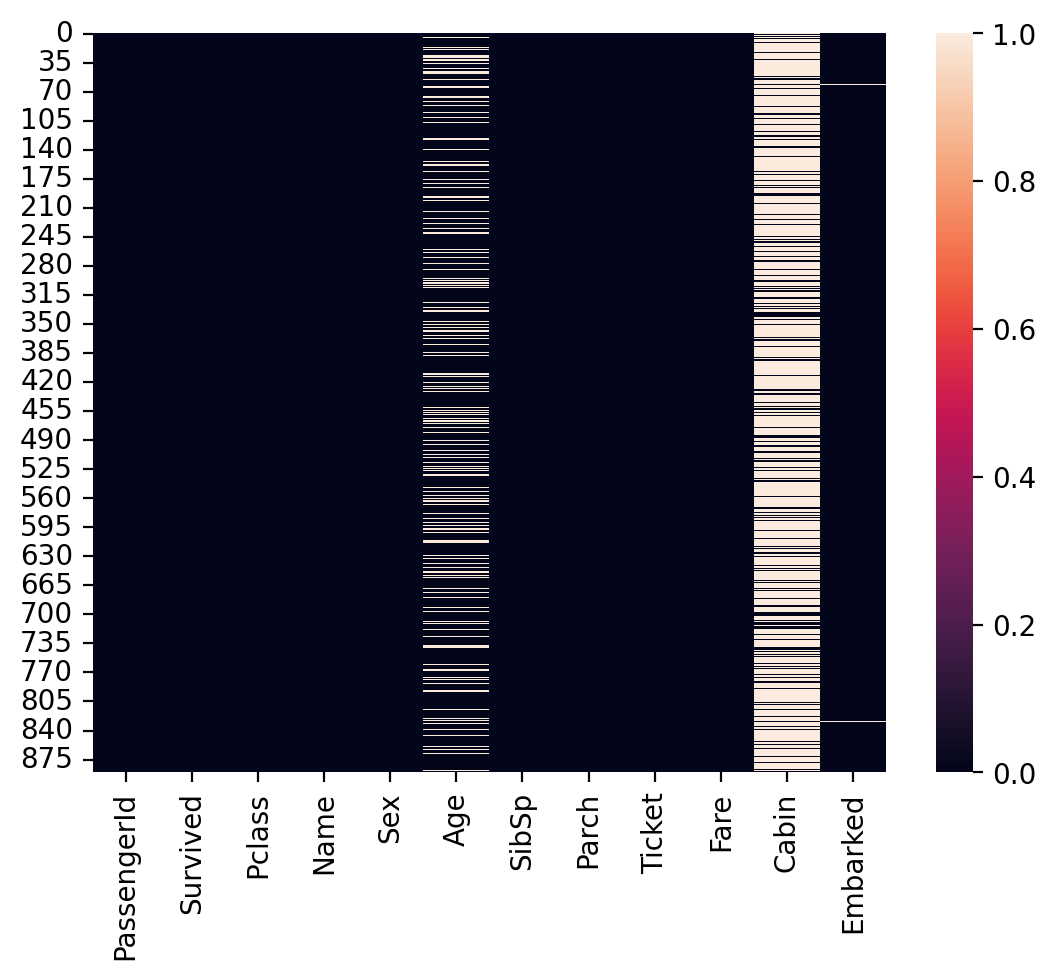

In [12]:
sns.heatmap(df_titanic.isna());

### Krok 2: Analiza rozkładu danych

Po *zidentyfikowaniu* brakujących danych, następnym krokiem jest określenie, w jaki sposób te brakujące dane są *rozłożone*.

#### Czy zmienna $Y$ jest *różna* w zależności od tego, czy $X$ jest `nan`?

Jednym z podejść jest zapytanie, czy jakaś zmienna będąca przedmiotem zainteresowania (np. `Przeżył`) jest *różna* w zależności od tego, czy jakaś *inna* zmienna jest `nan`.

In [13]:
### Średnie przeżycie dla osób bez danych dotyczących informacji o kabinie
df_titanic[df_titanic['Cabin'].isna()]['Survived'].mean()

np.float64(0.29985443959243085)

In [14]:
### Średnie przeżycie dla osób *posiadających* dane dotyczące informacji o kabinie
df_titanic[~df_titanic['Cabin'].isna()]['Survived'].mean()

np.float64(0.6666666666666666)

#### Twoja kolej!

Jaki jest średni wskaźnik `Survived` dla wartości z wartością `nan` dla `Age` w porównaniu do tych z wartościami non-null? Jak wypada to w porównaniu z ogólnym wskaźnikiem `Survived`?

In [ ]:
### Twój kod tutaj

#### Pakiet `missingno`

Jeśli chcesz zagłębić się w temat, możesz zapoznać się z biblioteką `missingno` w Pythonie (którą należy zainstalować osobno).

- [Tutorial pakietu `missingno`](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009).
- [Strona domowa pakietu `missingno`](https://github.com/ResidentMario/missingno). 

<iframe width="560" height="315" src="https://www.youtube.com/embed/Wdvwer7h-8w?si=HAHObrrWiYjbgPr5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


### Znalezienie przyczyny braku danych przy użyciu wykresu macierzowego 

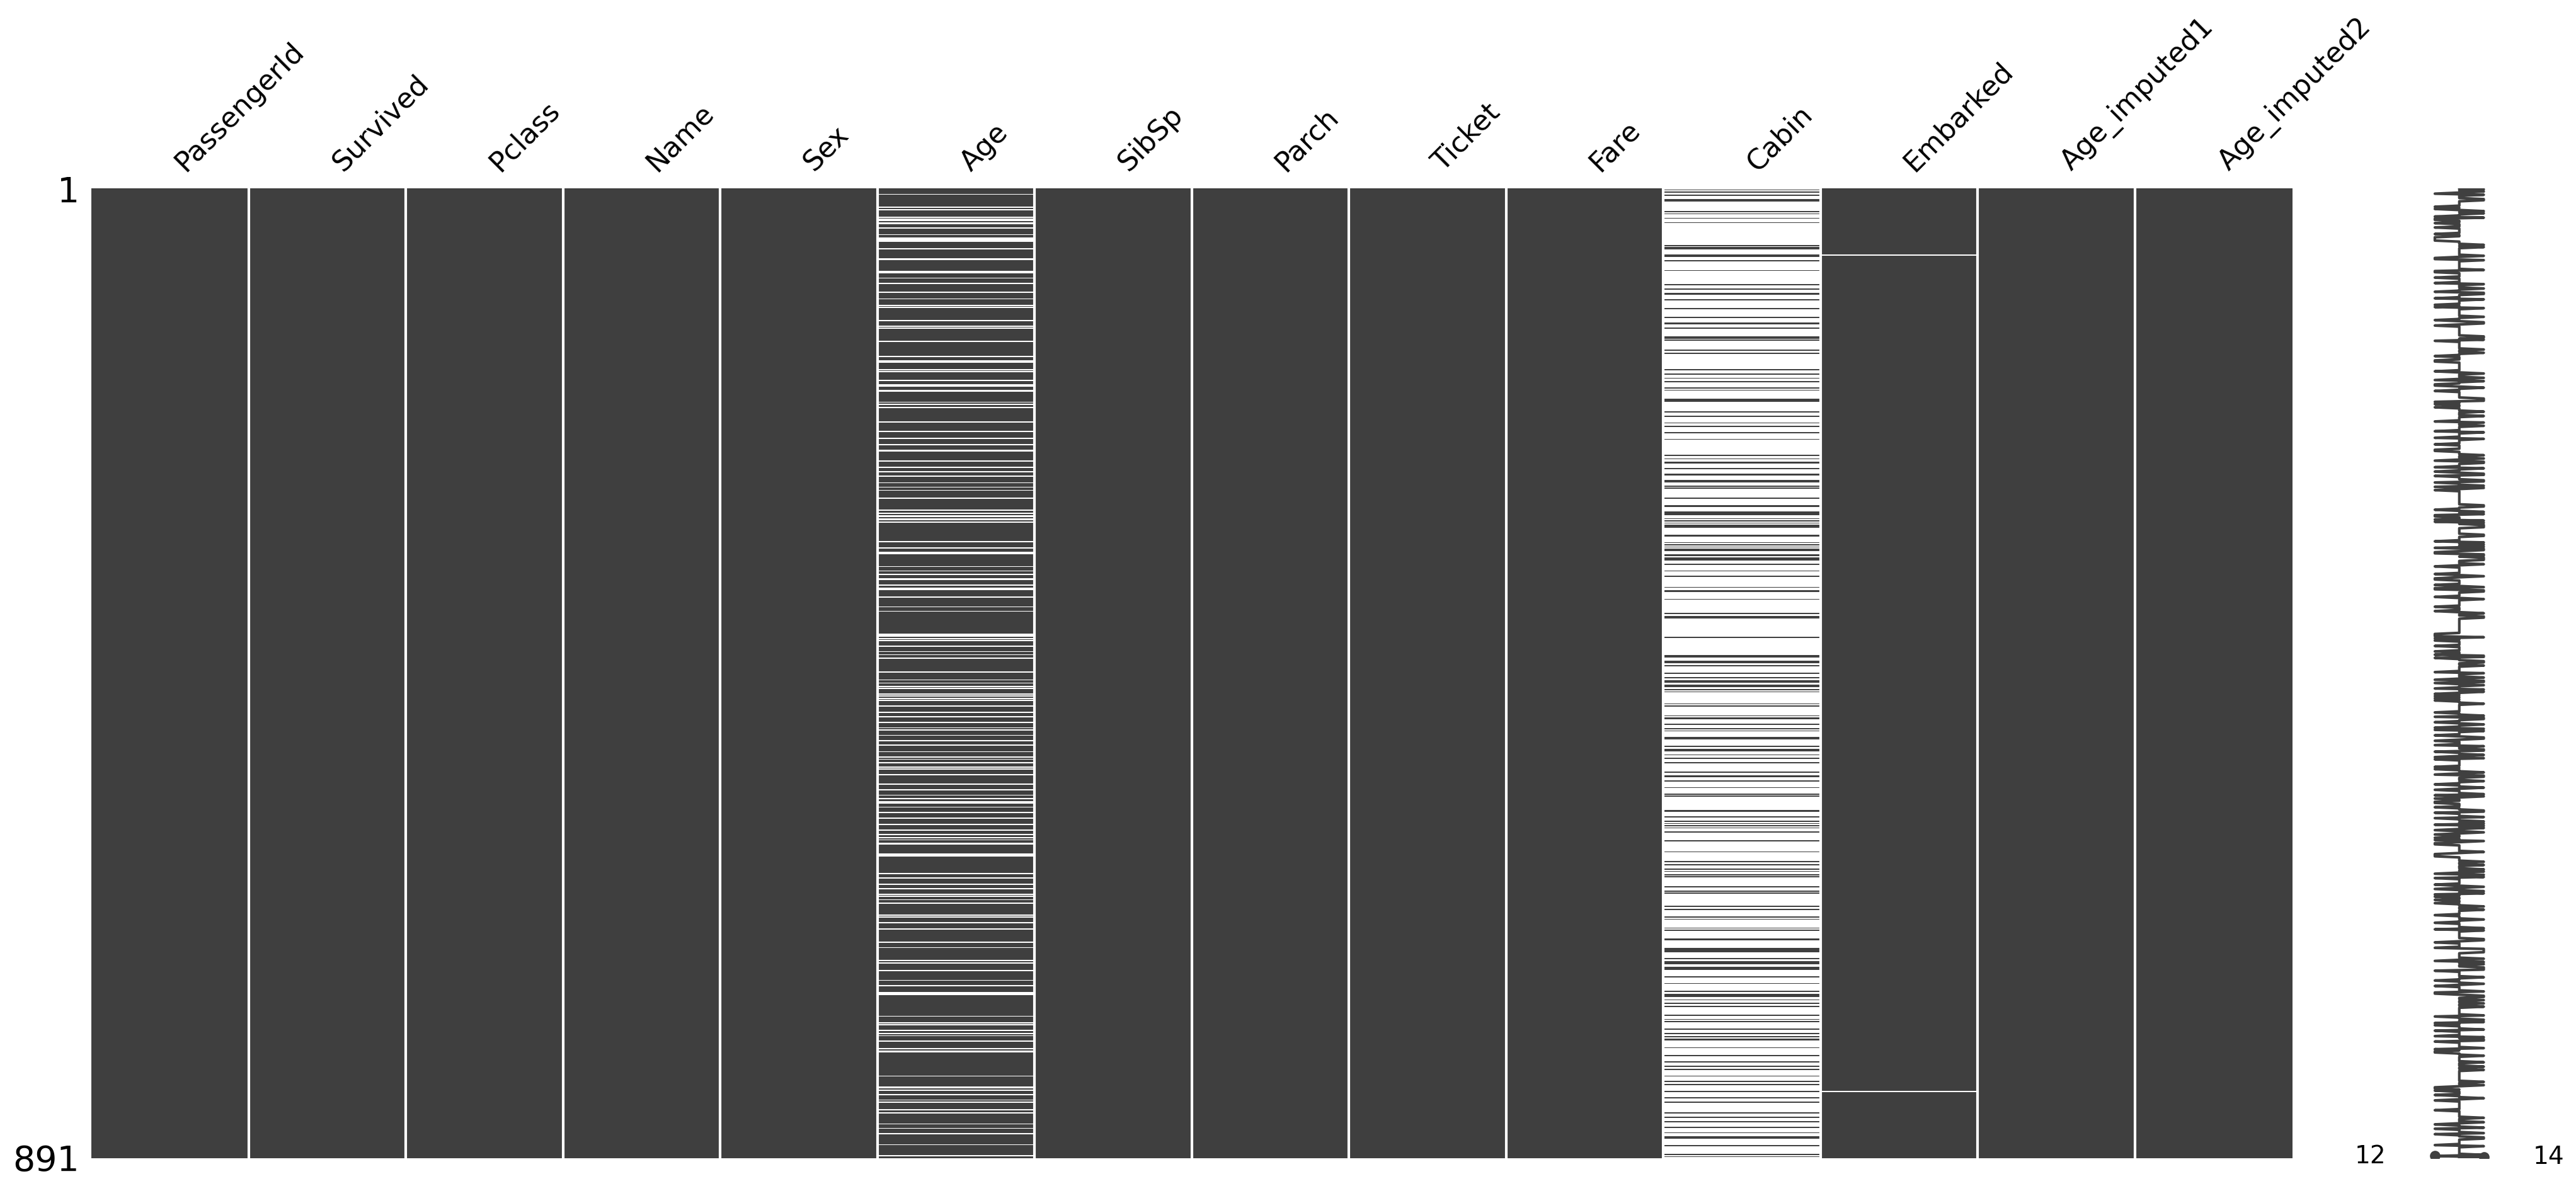

In [21]:
import missingno as msno
msno.matrix(df_titanic);

### Znalezienie przyczyny brakujących danych przy użyciu Heatmapy

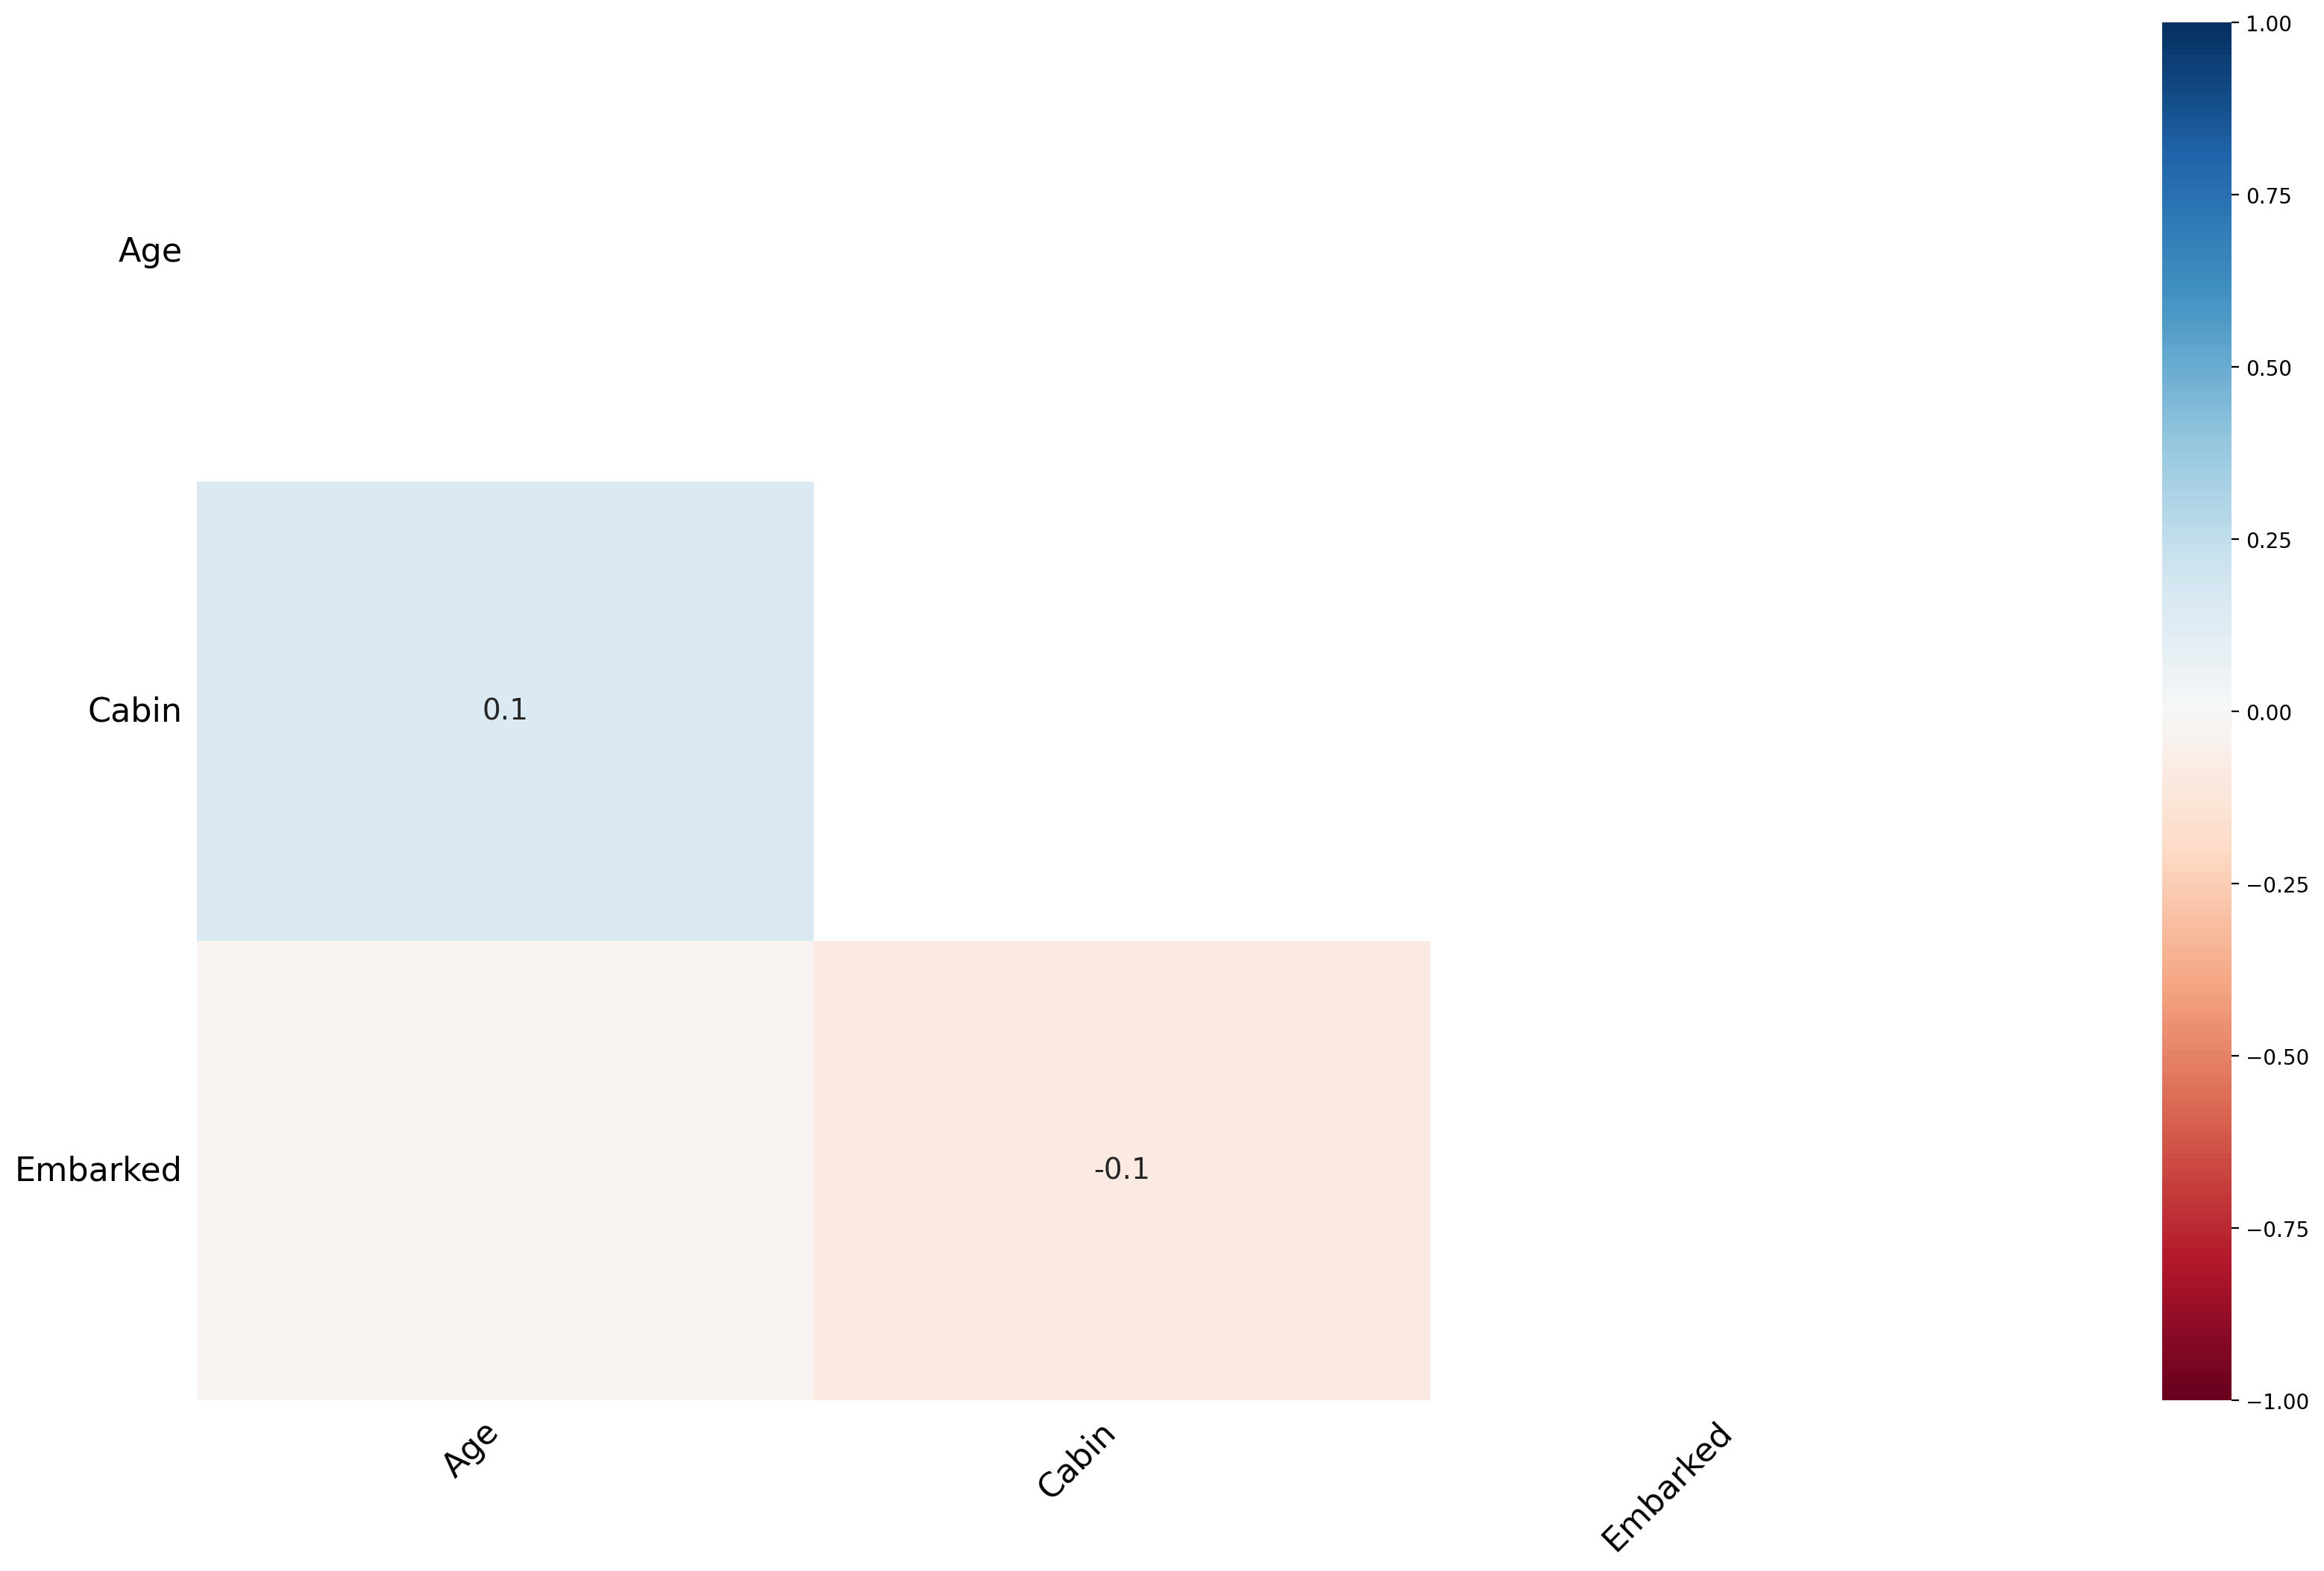

In [22]:
msno.heatmap(df_titanic);

Funkcja mapy cieplnej pokazuje, że nie ma silnych korelacji między brakującymi wartościami różnych cech. To dobrze; niskie korelacje wskazują ponadto, że dane są MAR.

## Znajdowanie przyczyny braku danych przy użyciu dendrogramu 

Dendrogram to diagram drzewa brakujących danych. Grupuje on razem wysoce skorelowane zmienne.

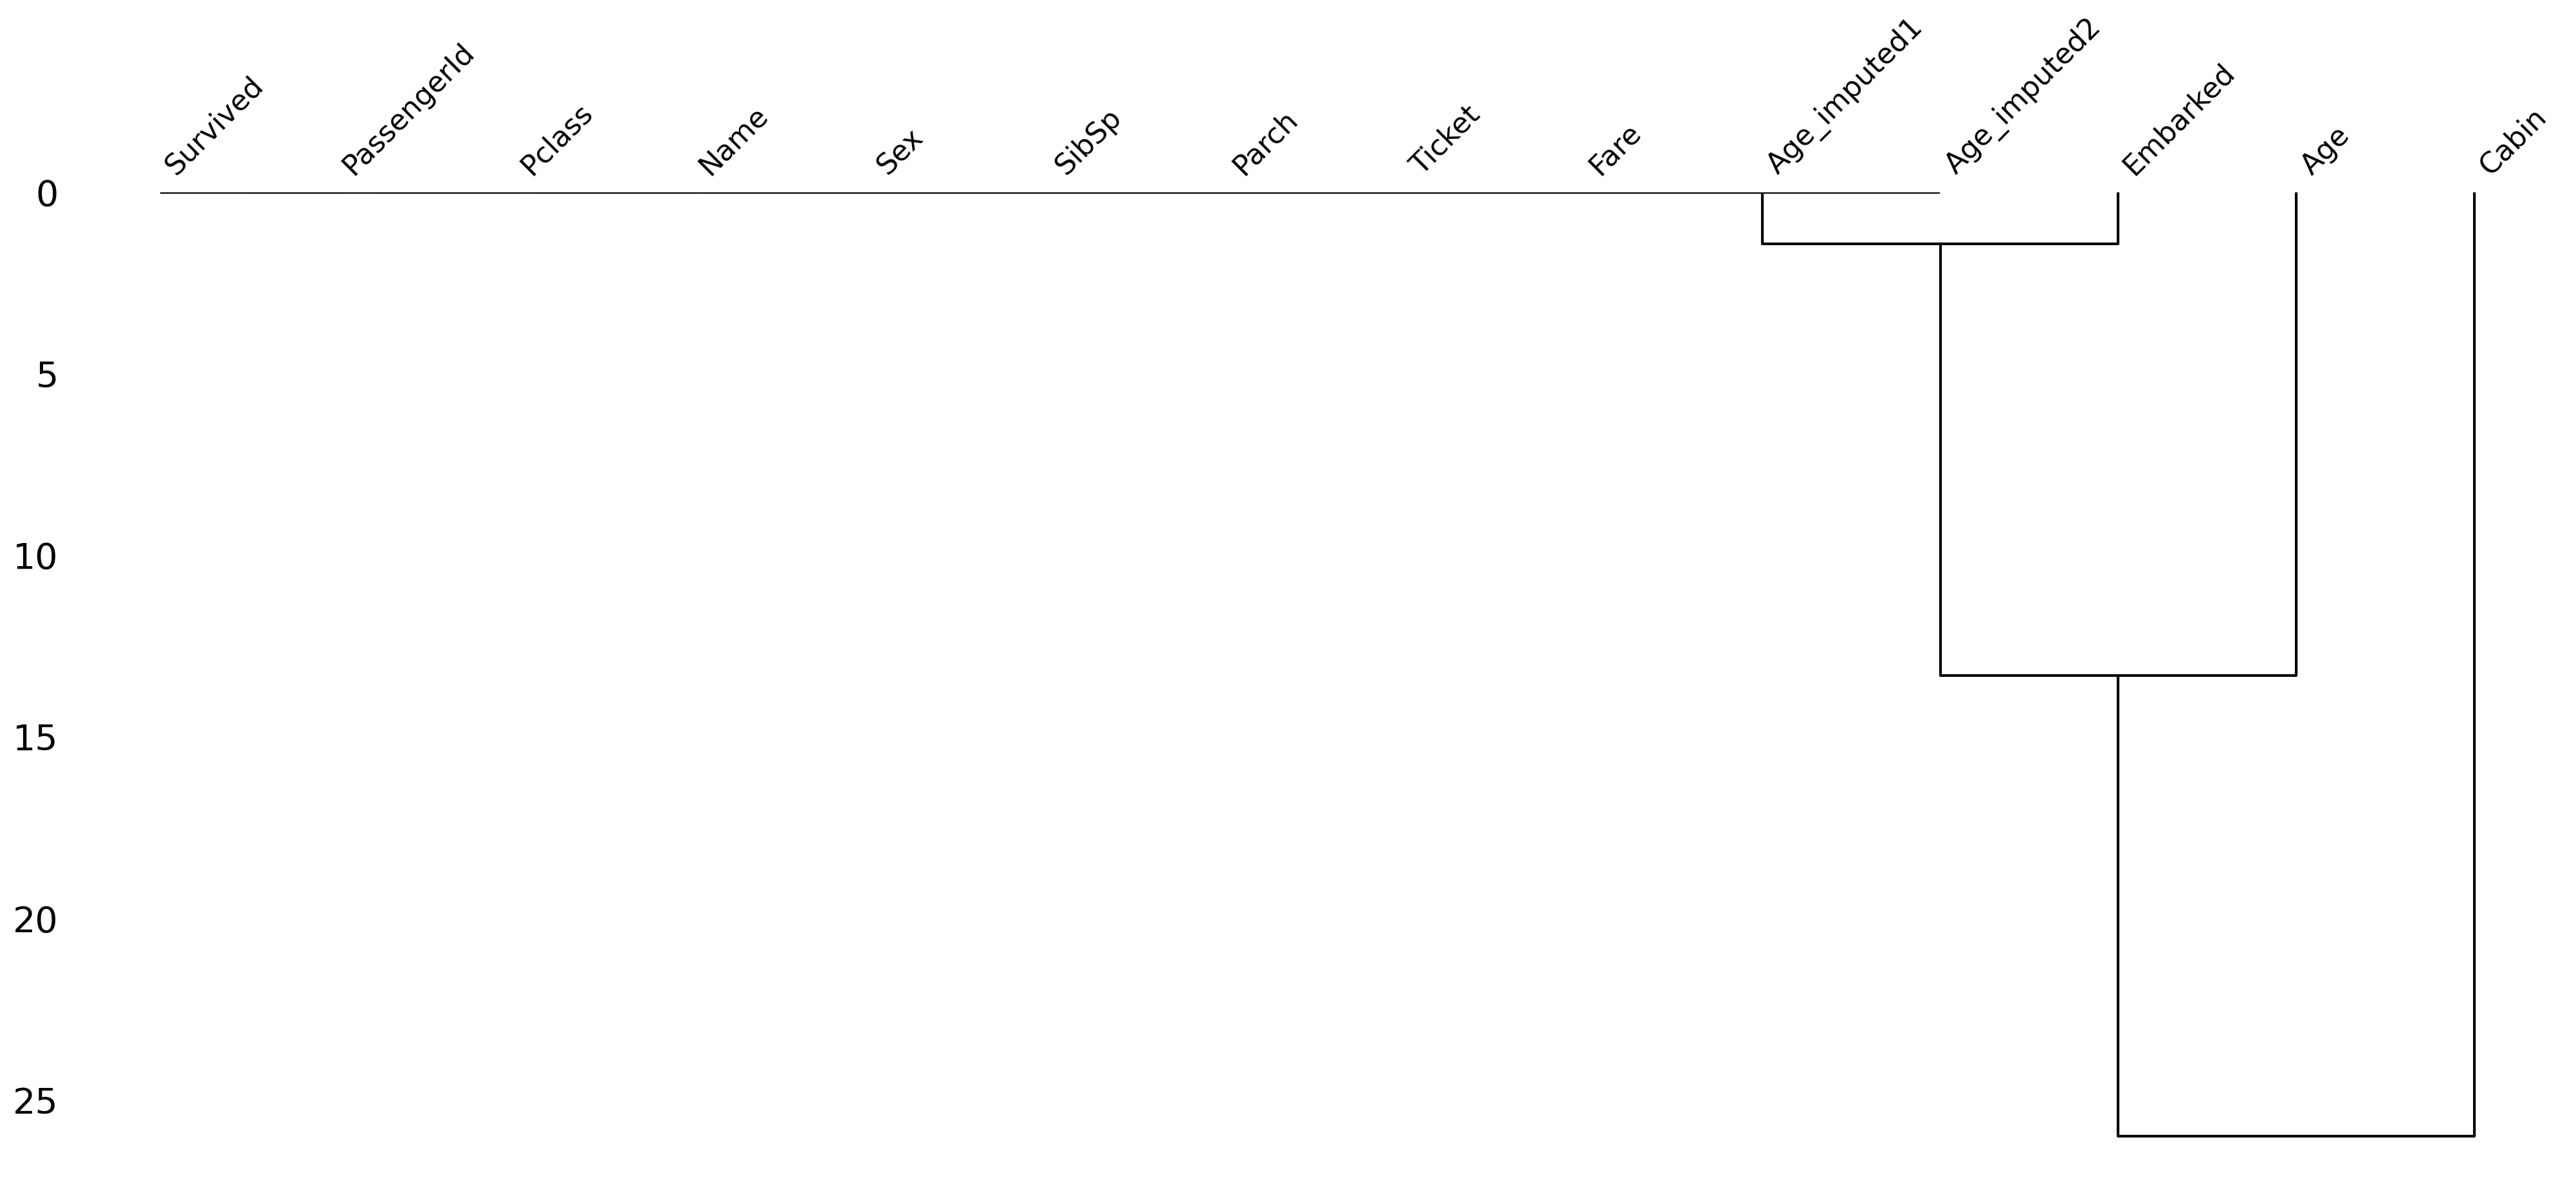

In [23]:
msno.dendrogram(df_titanic);

### Krok 3: Ustal, co należy zrobić!

Po *zidentyfikowaniu* brakujących danych należy określić, w jaki sposób je *obsłużyć*.

Istnieje kilka możliwych podejść.

- **Usunięcie** wszystkich wierszy z *wszystkimi* brakującymi danymi. 
- **Usuwanie** wierszy z brakującymi danymi tylko wtedy, gdy zmienna ta jest istotna dla analizy lub wizualizacji.
- **Imputowanie** (tj. zgadywanie), jakie wartości powinny mieć brakujące dane.

#### Usuwanie wszystkich wierszy z brakującymi danymi

- Możemy *filtrować* naszą `DataFrame` używając `dropna`, która automatycznie „usunie” wszystkie wiersze zawierające wartości null.  
- Uwaga: jeśli masz wiele brakujących danych, może to znacząco wpłynąć na rozmiar twojego zbioru danych.

In [15]:
df_filtered = df_titanic.dropna()
df_filtered.shape

(183, 12)

#### Usuwanie wszystkich wierszy z brakującymi danymi w określonych kolumnach

- Tutaj określamy, że chcemy tylko `dropna` dla wierszy, które mają `nan` w kolumnie `Age`.  
- Nadal mamy brakujące `nan` dla `Cabin`, ale być może w naszym przypadku jest to w porządku.

In [16]:
df_filtered = df_titanic.dropna(subset = "Age")
df_filtered.shape

(714, 12)

#### Imputowanie brakujących danych

Jednym z najbardziej złożonych (i kontrowersyjnych) podejść jest *imputowanie* wartości brakujących danych. 

Istnieje (ponownie) wiele sposobów, aby to zrobić:

1. Ustalenie **stałej** wartości i przypisanie jej do wszystkich wartości `nan`.
   - Na przykład, przypisz `średni` `wiek` wszystkim osobom z `nan` w tej kolumnie.
2. Spróbuj **odgadnąć** wartość na podstawie określonych cech danych.
   - Np. na podstawie innych cech tej osoby, jaki jest jej prawdopodobny `wiek`?
  

##### Imputowanie stałej wartości

Możemy użyć `fillna`, aby przypisać wszystkim wartościom z `nan` dla `Age` jakąś inną wartość.

In [17]:
## Przypisz średni wiek do wszystkich osób z nan dla wieku
df_titanic['Age_imputed1'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
## Przyjrzyjmy się teraz tym wierszom
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.699118
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,29.699118
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,29.699118
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,29.699118


##### Zgadywanie na podstawie innych cech

- Możesz spróbować *zgadnąć* jaki byłby ich `Age`, bazując na innych cechach.
- Bardziej wyrafinowaną wersją tego jest użycie **modelowania statystycznego** lub użycie `SimpleImputer` z biblioteki `sklearn`.  
- Na razie wystarczy zauważyć, że `Age` koreluje z innymi cechami (takimi jak `Pclass`).

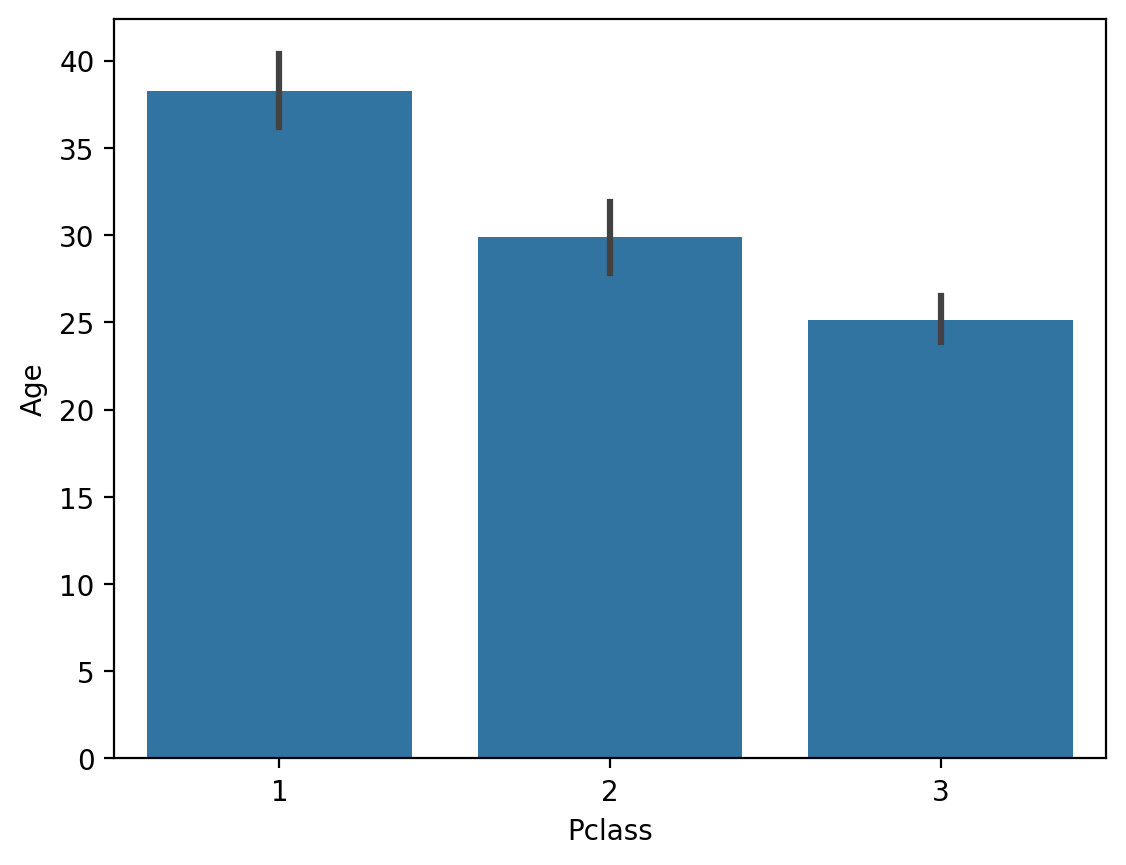

In [18]:
## Klasa pasażerów jest skorelowana z wiekiem
sns.barplot(data = df_titanic, x = 'Pclass', y = 'Age');

#### Twoja kolej!

Co by się stało, gdybyśmy użyli `fillna` z `median` `Age` zamiast `mean`? Dlaczego miałoby to znaczenie?

In [ ]:
### Twój kod tutaj

## Imputacja losowa / hot deck

Imputacja Hot Deck to metoda, w której każda brakująca wartość jest zastępowana wartością z podobnego rekordu w zbiorze danych, często określanego jako „dawca”. Rekord dawcy jest wybierany na podstawie kryteriów dopasowania - takich jak cechy demograficzne lub bliskość w wielowymiarowej przestrzeni cech - w celu zapewnienia, że imputacja zachowuje nieodłączny rozkład i relacje w danych.

Na przykład, jeśli brakuje danych o dochodach respondenta ankiety, wartość dochodu podobnego respondenta (oparta na czynnikach takich jak zawód, lokalizacja geograficzna i poziom wykształcenia) jest używana jako substytut.

Imputacja Hot Deck ma kluczowe znaczenie dla zachowania integralności zbioru danych. Zapewnia ona, że:

- Analizy statystyczne nie są stronnicze z powodu arbitralnego lub odrzucenia niekompletnych przypadków.
- Naturalna zmienność i wzorce dystrybucji obecne w kompletnych przypadkach są zachowane.
- Porównania między różnymi grupami w ramach danych pozostają wykonalne i ważne.


**Imputacja losowa Hot Deck**: W tej metodzie brakujące wartości są imputowane poprzez losowy wybór dawcy z puli potencjalnych kandydatów. Pozwala to zachować rozkład danych, zwłaszcza gdy braki są losowe. Wadą jest jednak to, że losowość może przeoczyć niuanse w danych.

**Imputacja Hot Deck najbliższego sąsiedztwa**: W tym przypadku dawca jest wybierany na podstawie podobieństwa obserwowanych cech. Powszechnie stosowanym algorytmem jest podejście k-najbliższych sąsiadów (k-NN), które oblicza metrykę odległości między obserwacjami. Dla rekordu z brakującą wartością określa się jego k najbliższych sąsiadów (pod względem odległości euklidesowej lub Mahalanobisa), a jedna z ich wartości jest używana do imputacji.

Algorytm k-NN identyfikuje najbliższe rekordy, które minimalizują odległość:

$d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$

gdzie:
- $(x)$ i $(y)$ to dwa punkty w przestrzeni n-wymiarowej,
- $(x_i)$ i $(y_i)$ to współrzędne punktów $(x)$ i $(y)$ w wymiarze $(i)$,
- $d(x, y)$ to [dległość euklidesowa](https://pl.wikipedia.org/wiki/Odległość) między punktami $(x)$ i $(y)$.


Imputacja Hot Deck oferuje kilka korzyści w porównaniu z innymi metodami:

1. **Imputacja średniej/mediany**: W przeciwieństwie do zwykłego zastępowania brakujących wartości ogólną średnią lub medianą, imputacja Hot Deck wykorzystuje informacje z podobnych przypadków. Pozwala to zachować lokalną zmienność i uwzględnia relacje między zmiennymi.

2. **Imputacja regresyjna**: Podczas gdy imputacja regresji opiera się na modelach predykcyjnych w celu oszacowania brakujących wartości, może ona prowadzić do stronniczych szacunków, jeśli założenia modelu zostaną naruszone. Natomiast imputacja Hot Deck bezpośrednio zapożycza obserwowane wartości, często czyniąc ją bardziej odporną w różnych warunkach.

3. **Imputacja wielokrotna**: Imputacja wielokrotna tworzy kilka imputowanych zestawów danych i łączy wyniki do ostatecznej analizy, uwzględniając niepewność imputacji. Chociaż często jest bardziej wyrafinowana statystycznie, może być kosztowna obliczeniowo. Imputacja Hot Deck pozostaje praktycznym wyborem, gdy priorytetem jest zachowanie łatwości interpretacji i wydajności obliczeniowej.

Głównym wnioskiem jest to, że **imputacja Hot Deck oferuje intuicyjne, praktycznie wykonalne podejście, które nadal respektuje statystyczne właściwości danych**.

### Imputacja losowa Hot-deck

In [27]:
# Przykład imputacji losowej Hot Deck
def random_hot_deck_imputation(df, column):
    # Filtrujemy wartości nie-null
    non_null_values = df[column].dropna().values
    # Zastępujemy NaN losową wartością z istniejących
    df[column] = df[column].apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    return df

# Imputacja dla kolumny 'Age'
df_titanic = random_hot_deck_imputation(df_titanic, 'Age')
df_titanic.isna().any()

PassengerId     False
Survived        False
Pclass          False
Name            False
Sex             False
Age             False
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked         True
Age_imputed1    False
Age_imputed2    False
dtype: bool

### Imputacja Hot Deck najbliższego sąsiedztwa (k-NN)

In [29]:
from sklearn.impute import KNNImputer

# Tworzymy obiekt KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # Możesz zmienić liczbę sąsiadów

# Wybieramy kolumny numeryczne do imputacji
columns_to_impute = ['Age', 'Fare']  # Przykład kolumn
df_titanic[columns_to_impute] = knn_imputer.fit_transform(df_titanic[columns_to_impute])

df_titanic.isna().any()

PassengerId     False
Survived        False
Pclass          False
Name            False
Sex             False
Age             False
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked         True
Age_imputed1    False
Age_imputed2    False
dtype: bool

### Podsumowanie 

1. Imputacja losowa Hot Deck:

- Wartości NaN w kolumnie są zastępowane losową wartością z istniejących danych w tej samej kolumnie.
- Jest to szybkie, ale może wprowadzać losowość, która nie uwzględnia zależności między zmiennymi.

2. Imputacja Hot Deck najbliższego sąsiedztwa (k-NN):

- Algorytm k-NN wykorzystuje inne cechy (np. Pclass, Fare), aby znaleźć podobne rekordy i imputować brakujące wartości.
- Jest bardziej zaawansowany i uwzględnia relacje między zmiennymi.

## Brudne dane

Wiele razy spędzamy godziny na rozwiązywaniu problemów z brakującymi wartościami, niespójnościami logicznymi lub wartościami odstającymi w naszych zbiorach danych. W tym poradniku omówimy najpopularniejsze techniki oczyszczania danych.

Będziemy pracować z nieuporządkowanym zbiorem danych iris. Pierwotnie opublikowany w UCI Machine Learning Repository: Iris Data Set, ten niewielki zbiór danych z 1936 roku jest często używany do testowania algorytmów uczenia maszynowego i wizualizacji. Każdy wiersz tabeli reprezentuje kwiat irysa, w tym jego gatunek i wymiary jego części botanicznych, działki i płatka, w centymetrach.

Zapoznaj się z tym zestawem danych tutaj:

In [34]:
dirty_iris = pd.read_csv("data/dirty_iris.csv")
dirty_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica


Spójne dane to technicznie poprawne dane, które nadają się do analizy statystycznej. Są to dane, w których brakujące wartości, wartości specjalne, (oczywiste) błędy i wartości odstające zostały usunięte, skorygowane lub przypisane. Dane są zgodne z ograniczeniami opartymi na rzeczywistej wiedzy na temat przedmiotu, który dane opisują.

![title](img/iris.png)

Mamy następującą wiedzę podstawową:

- Gatunek powinien być jedną z następujących wartości: setosa, versicolor lub virginica.

- Wszystkie zmierzone właściwości liczbowe tęczówki powinny być dodatnie.

- Długość płatka irysa jest co najmniej 2 razy większa od jego szerokości.

- Długość działki irysa nie może przekraczać 30 cm.

- Działki tęczówki są dłuższe niż jej płatki.

Zdefiniujemy teraz te reguły w osobnym obiekcie „RULES” i wczytamy je do Pythona. Wydrukujemy wynikowy obiekt ograniczenia:

In [35]:
# Definiujemy reguły jako funkcje:
def check_rules(df):
    rules = {
        "Sepal.Length <= 30": df["Sepal.Length"] <= 30,
        "Species in ['setosa', 'versicolor', 'virginica']": df["Species"].isin(['setosa', 'versicolor', 'virginica']),
        "Sepal.Length > 0": df["Sepal.Length"] > 0,
        "Sepal.Width > 0": df["Sepal.Width"] > 0,
        "Petal.Length > 0": df["Petal.Length"] > 0,
        "Petal.Width > 0": df["Petal.Width"] > 0,
        "Petal.Length >= 2 * Petal.Width": df["Petal.Length"] >= 2 * df["Petal.Width"],
        "Sepal.Length > Petal.Length": df["Sepal.Length"] > df["Petal.Length"]
    }
    return rules

# Reguły do ramki danych:
rules = check_rules(dirty_iris)

# Wydruk:
for rule, result in rules.items():
    print(f"{rule}: {result.all()}")

Sepal.Length <= 30: False
Species in ['setosa', 'versicolor', 'virginica']: True
Sepal.Length > 0: False
Sepal.Width > 0: False
Petal.Length > 0: False
Petal.Width > 0: False
Petal.Length >= 2 * Petal.Width: False
Sepal.Length > Petal.Length: False


Teraz możemy określić, jak często każda reguła jest łamana (naruszenia). Możemy również podsumować i wykreślić wynik.

In [36]:
# Sprawdzamy naruszenia reguł:
violations = {rule: ~result for rule, result in rules.items()}

# Podsumowujemy je:
summary = {rule: result.sum() for rule, result in violations.items()}

# Wydruczek:
print("Summary of Violations:")
for rule, count in summary.items():
    print(f"{rule}: {count} violations")

Summary of Violations:
Sepal.Length <= 30: 12 violations
Species in ['setosa', 'versicolor', 'virginica']: 0 violations
Sepal.Length > 0: 11 violations
Sepal.Width > 0: 19 violations
Petal.Length > 0: 20 violations
Petal.Width > 0: 12 violations
Petal.Length >= 2 * Petal.Width: 34 violations
Sepal.Length > Petal.Length: 30 violations


Jaki procent % danych ma błędy?

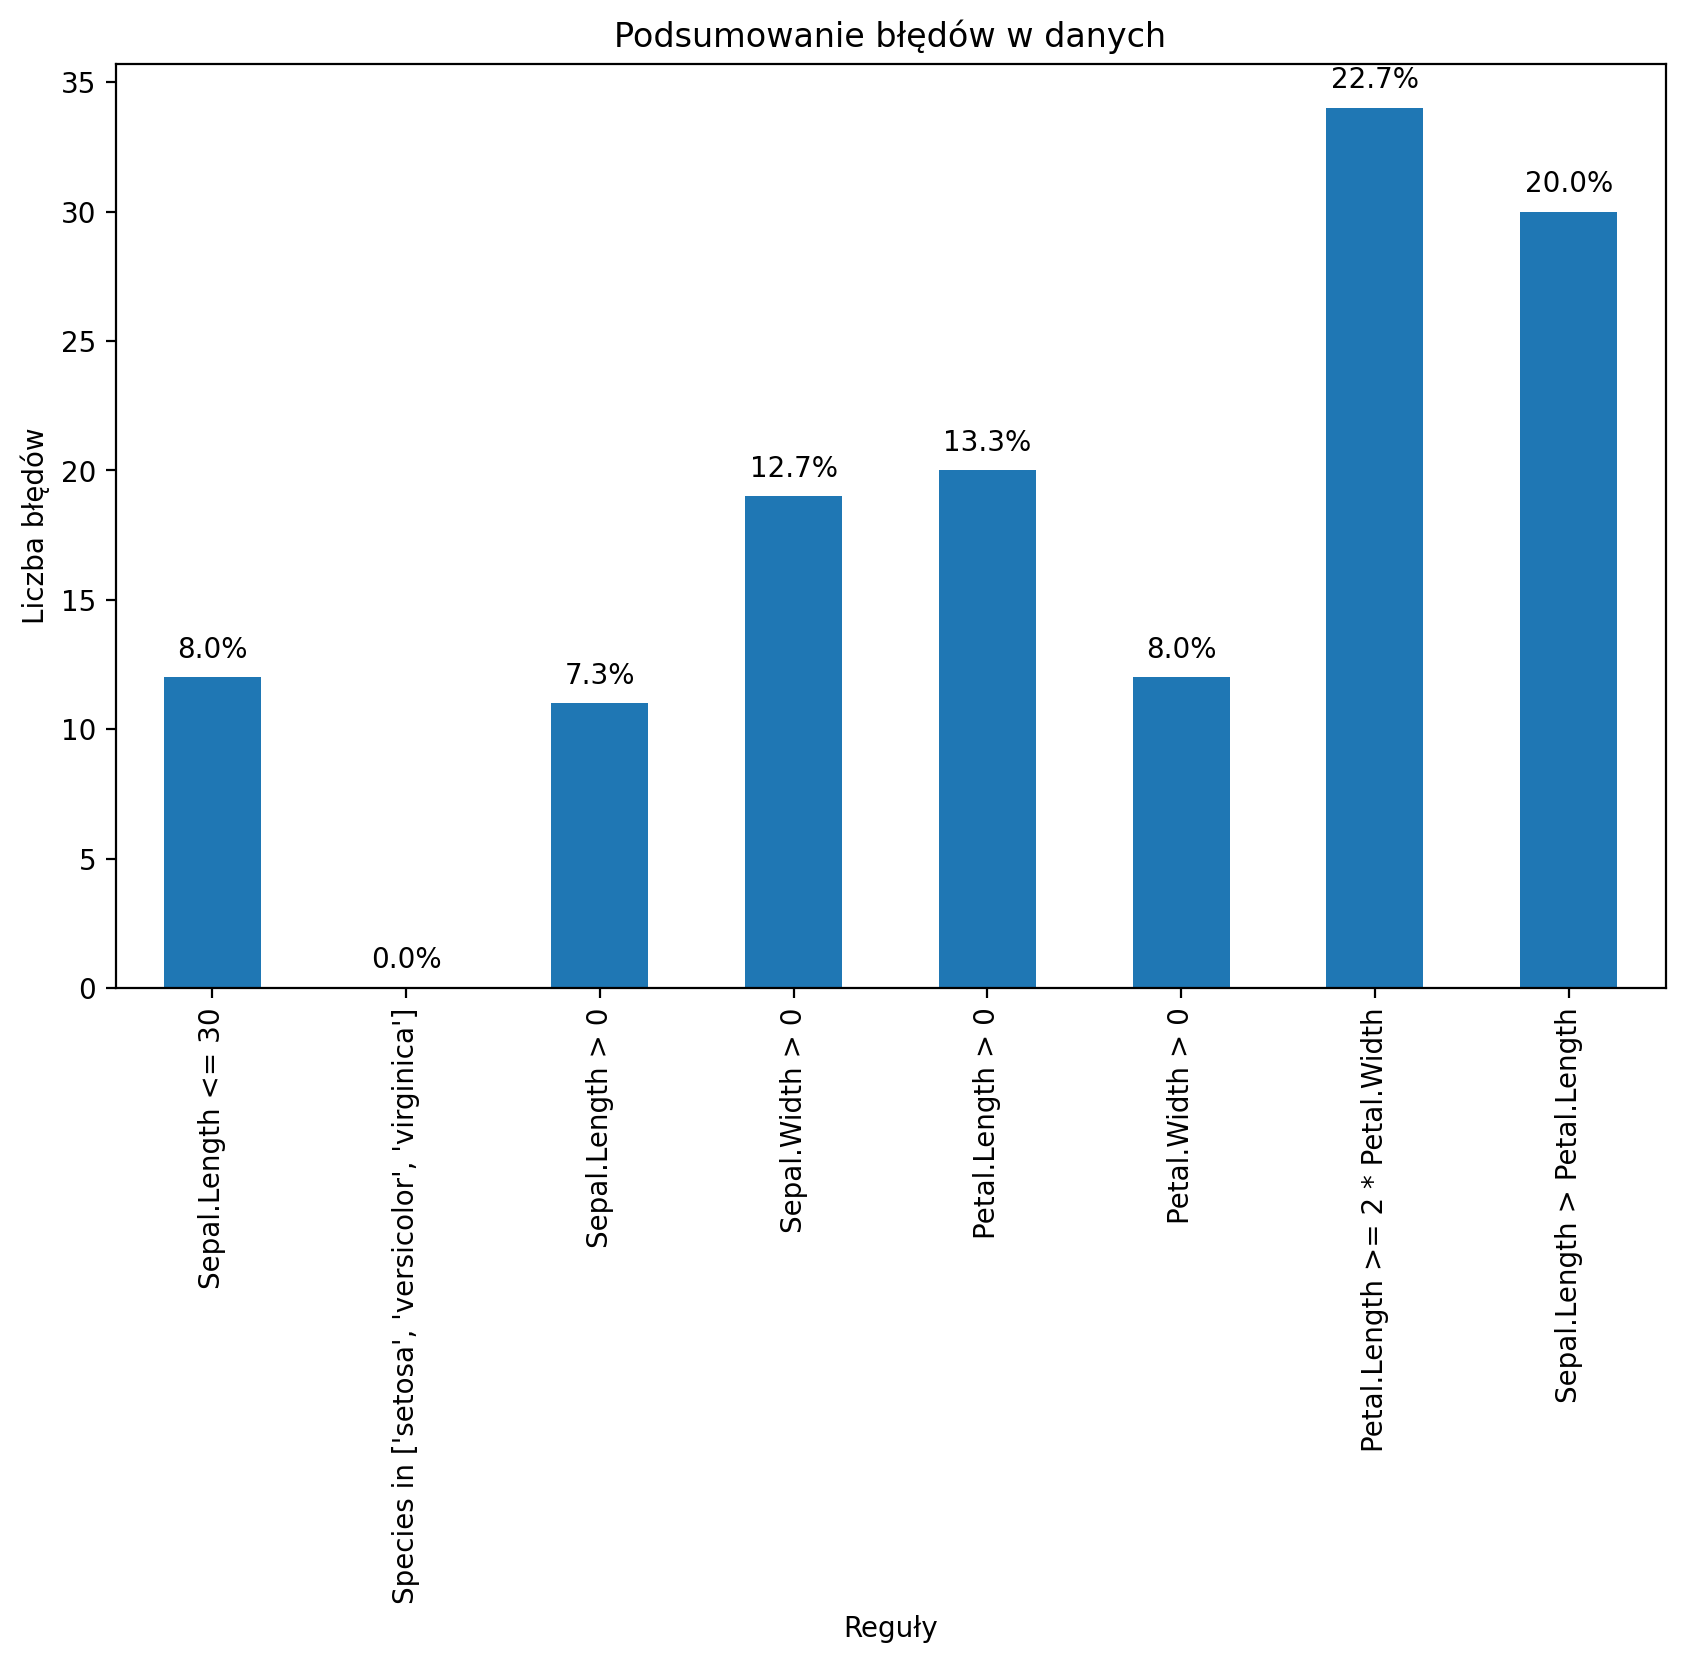

In [38]:
import matplotlib.pyplot as plt
# Wykres naruszeń:
violation_counts = pd.Series(summary)
ax = violation_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Podsumowanie błędów w danych')
plt.xlabel('Reguły')
plt.ylabel('Liczba błędów')

# Dodaję procenty nad słupki:
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(dirty_iris) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Sprawdź, które kwiaty mają zbyt długie działki kielicha, korzystając z wyników naruszeń.

In [43]:
violations = {rule: ~result for rule, result in rules.items()}
violated_df = pd.DataFrame(violations)
violated_rows = dirty_iris[violated_df["Sepal.Length <= 30"]]
print(violated_rows)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
14            NaN          3.9          1.70          0.4      setosa
18            NaN          4.0           NaN          0.2      setosa
24            NaN          3.0          5.90          2.1   virginica
27           73.0         29.0         63.00          NaN   virginica
29            NaN          2.8          0.82          1.3  versicolor
57            NaN          2.9          4.50          1.5  versicolor
67            NaN          3.2          5.70          2.3   virginica
113           NaN          3.3          5.70          2.1   virginica
118           NaN          3.0          5.50          2.1   virginica
119           NaN          2.8          4.70          1.2  versicolor
124          49.0         30.0         14.00          2.0      setosa
137           NaN          3.0          4.90          1.8   virginica


Znajdźmy wartości odstające w długości działki przy użyciu metody boxplot. 

Pobierzemy odpowiednie obserwacje i sprawdź pozostałe wartości. 

Jakieś pomysły, co mogło się stać? 

Ustawimy wartości odstające na NA (lub wartość, którą uznasz za bardziej odpowiednią).

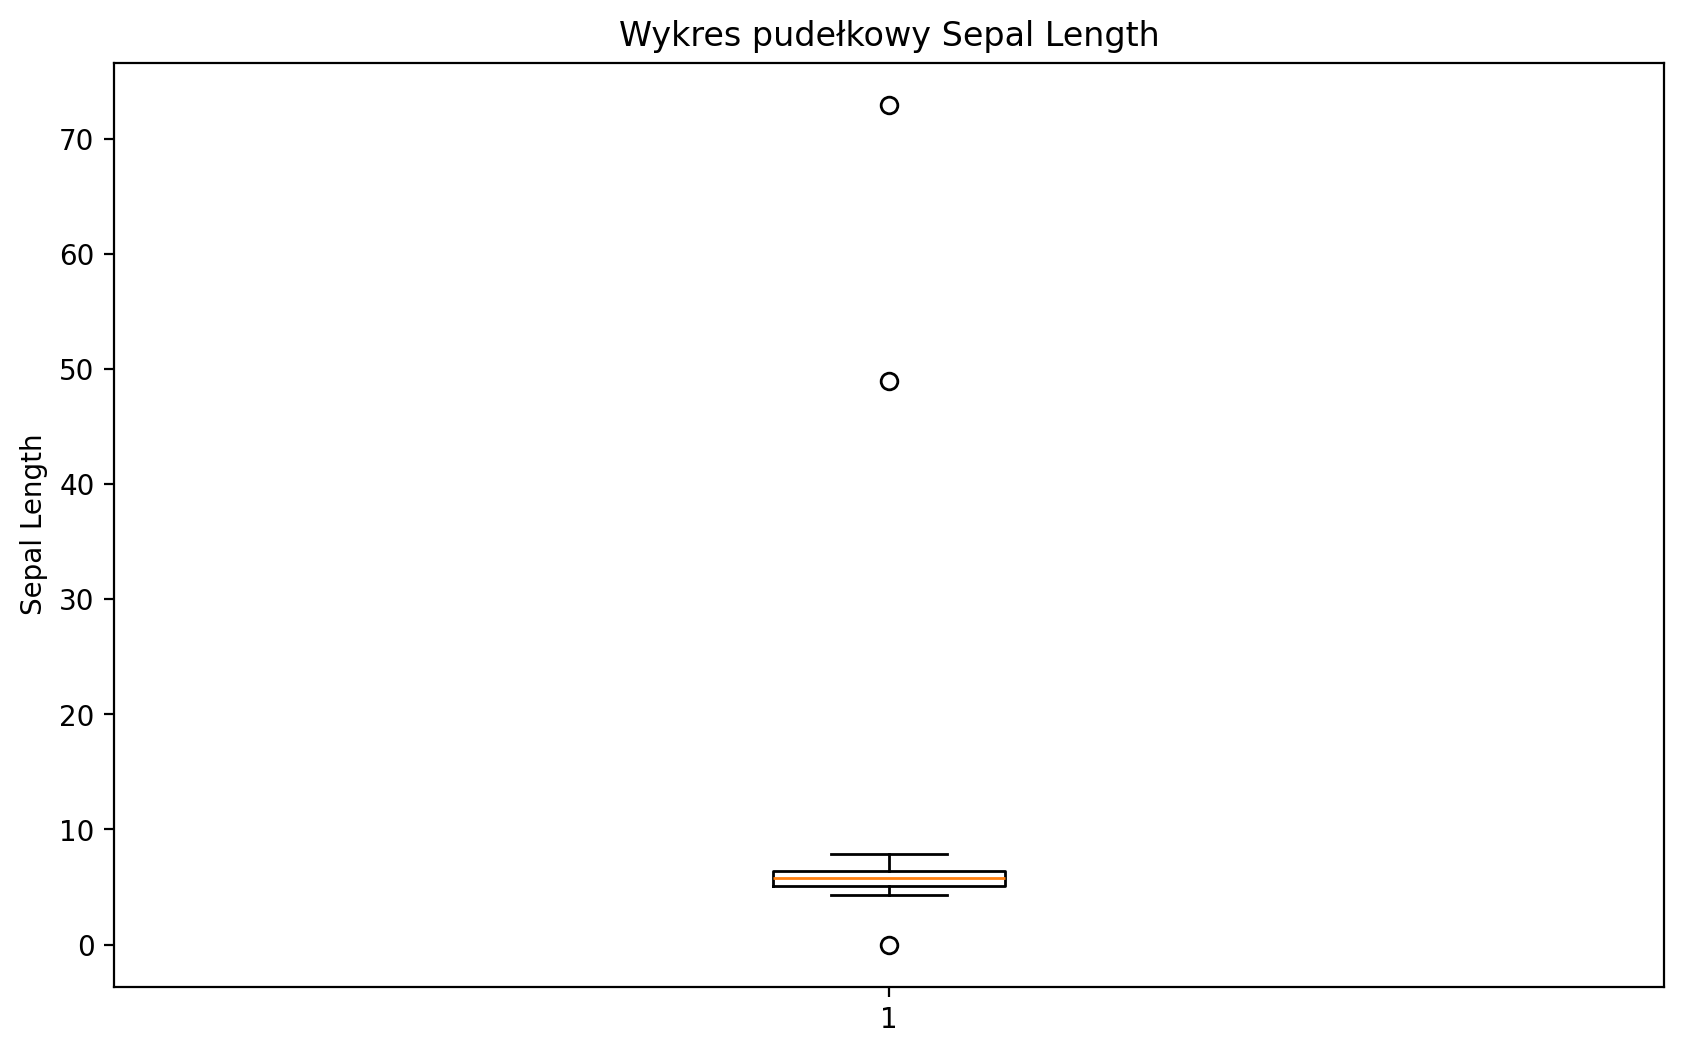

In [46]:
plt.figure(figsize=(10, 6))
plt.boxplot(dirty_iris['Sepal.Length'].dropna())
plt.title('Wykres pudełkowy Sepal Length')
plt.ylabel('Sepal Length')
plt.show()

In [47]:
# Znajdziemy obserwacje odstające:
outliers = dirty_iris['Sepal.Length'][np.abs(dirty_iris['Sepal.Length'] - dirty_iris['Sepal.Length'].mean()) > (1.5 * dirty_iris['Sepal.Length'].std())]
outliers_idx = dirty_iris.index[dirty_iris['Sepal.Length'].isin(outliers)]

# Wydrukujemy je:
print("Odstające:")
print(dirty_iris.loc[outliers_idx])

Odstające:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
27           73.0         29.0          63.0          NaN  virginica
124          49.0         30.0          14.0          2.0     setosa


Wszystkie wydają się za duże... może były mierzone w mm zamiast w cm?

In [49]:
# Skorygujemy wartości odstające (zakładając, że zostały zmierzone w mm zamiast w cm).
dirty_iris.loc[outliers_idx, ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']] /= 10

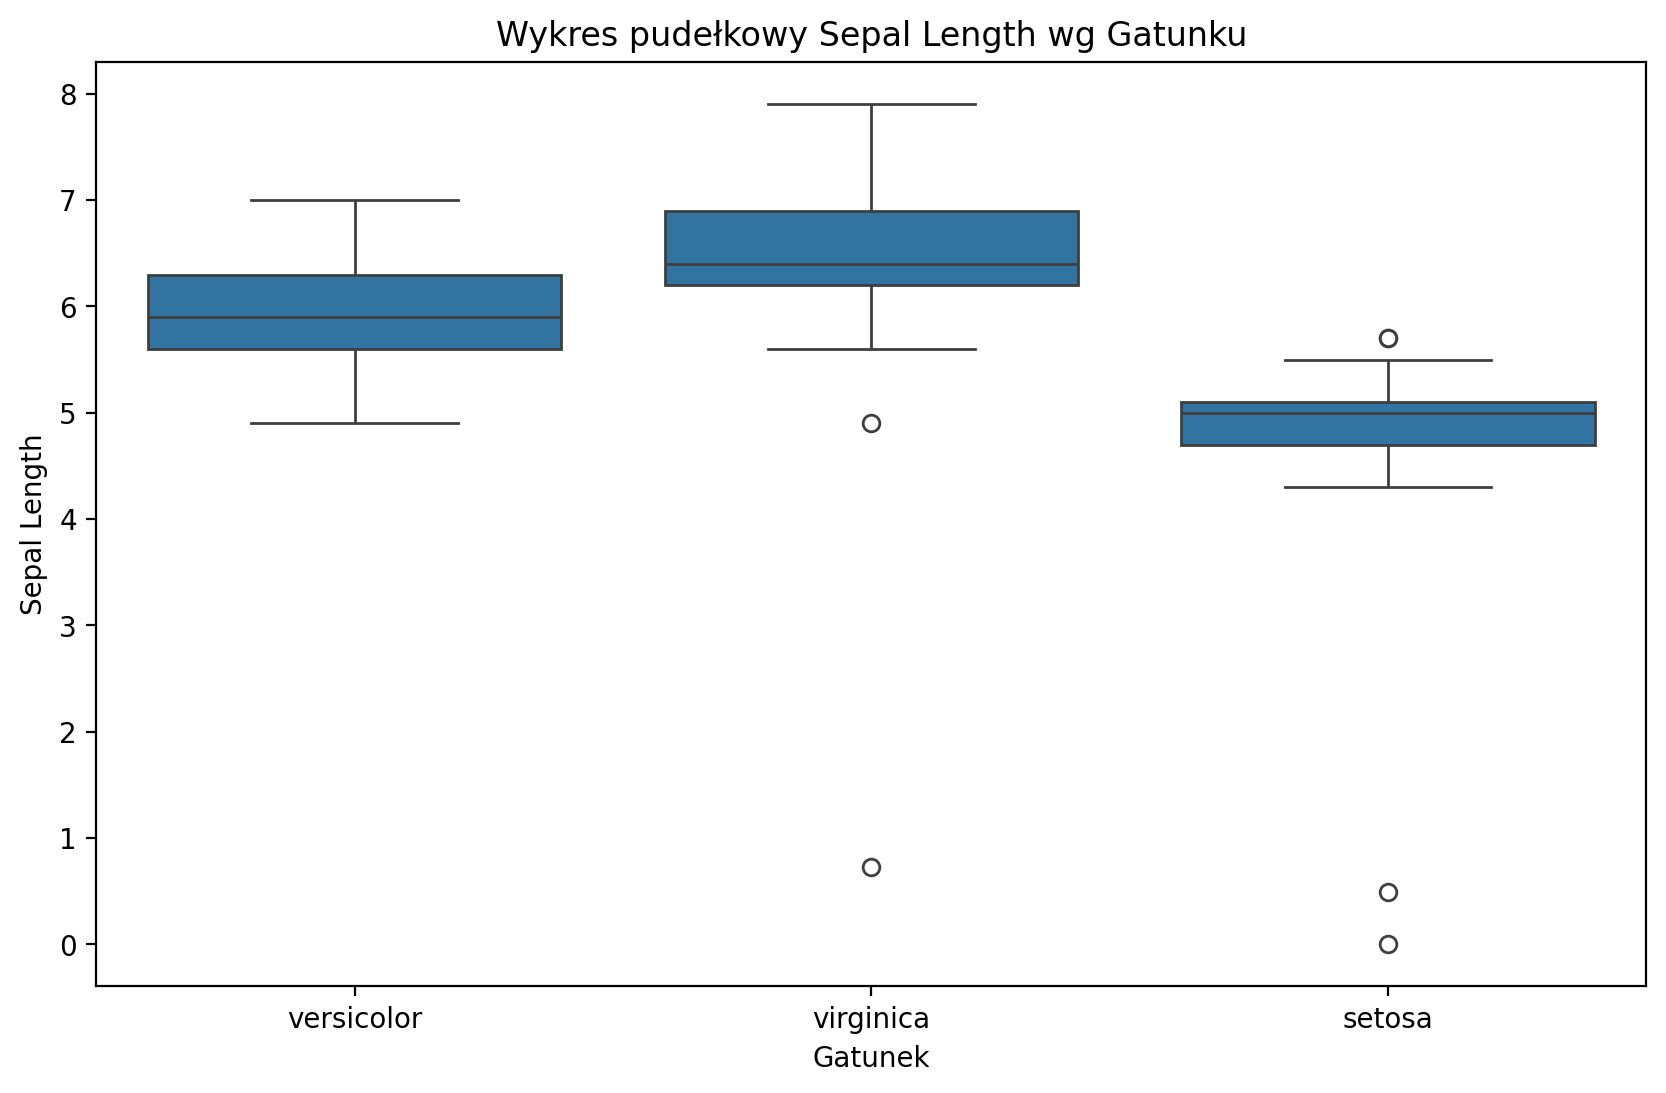

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Sepal.Length', data=dirty_iris)
plt.title('Wykres pudełkowy Sepal Length wg Gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Sepal Length')
plt.show()

Zwróćmy uwagę, że prosty boxplot pokazuje dodatkową wartość odstającą!

## Korekta błędów

Zastąpmy wartości niedodatnie z Sepal.Width wartością NA:

## Łączenie zbiorów danych

> **Łączenie** odnosi się do *łączenia* różnych zbiorów danych w celu wykorzystania mocy dodatkowych informacji.
> 
- Może łączyć zbiory danych jako funkcję:
   - Wspólnego *okna czasowego*. 
   - Wspólnej *tożsamości*.

### Dlaczego scalać?

- Każdy zbiór danych zawiera *ograniczone* informacje.
   - Na przykład „PKB” według „roku”. 
- Ale **łączenie** zbiorów danych pozwala nam zobaczyć, jak więcej zmiennych jest ze sobą powiązanych i wzajemnie na siebie oddziałuje.
- Wiele badań obejmuje **lokalizowanie** zbiorów danych i zastanawianie się, jak je **połączyć**.

### Jak scalać?

W Pythonie, `pandas.merge` pozwala nam połączyć dwie `DataFrame` na wspólnej kolumnie (kolumnach).

```python
pd.merge(df1, df2, on = "shared_column")
```

### `merge` w praktyce

Dla demonstracji, połączymy dwa zbiory danych lingwistycznych:

- Jeden zbiór danych zawiera informacje o **Age of Acquisition** różnych angielskich słów (Kuperman et al., 2014).
- Drugi zbiór danych zawiera informacje o **częstotliwości** i **konkretności** angielskich słów (Brysbaert et al., 2014).

#### Ładujemy dane

In [55]:
df_aoa = pd.read_csv("data/wrangling/AoA.csv")
df_aoa.head(1)

,Word,AoA
0,a,2.89


In [56]:
df_conc = pd.read_csv("data/wrangling/concreteness.csv")
df_conc.head(1)

,Word,Concreteness,Frequency,Dom_Pos
0,sled,5.0,149,Adjective


#### Różne *rodzaje* łączenia

Jak widzimy, zbiory danych nie są tej samej **wielkości**. To pozostawia nam decyzję do podjęcia podczas łączenia.

- `inner` join: Czy zachowujemy tylko słowa w *obu* zbiorach danych?
- `left` join: Czy zachowujemy wszystkie słowa w jednym zbiorze danych („lewym”), niezależnie od tego, czy występują w drugim?
- `right` join: Czy zachowujemy wszystkie słowa w jednym zbiorze danych („prawym”), niezależnie od tego, czy występują w drugim?
- `outer` join: Czy zachowujemy wszystkie słowa w obu zbiorach, pozostawiając puste (`nan`) wartości tam, gdzie słowo występuje tylko w jednym zbiorze danych?

In [57]:
df_aoa.shape

(31124, 2)

In [58]:
df_conc.shape

(28612, 4)

#### `inner` join

- Dla naszych celów najbardziej sensowne jest użycie `inner` join.
- Pozostawia nam to mniej słów niż występuje w *obu* zbiorach danych.

In [59]:
df_merged = pd.merge(df_aoa, df_conc, on = "Word", how = "inner")
df_merged.head(2)

,Word,AoA,Concreteness,Frequency,Dom_Pos
0,aardvark,9.89,4.68,21,Noun
1,abacus,8.69,4.52,12,Noun


In [60]:
df_merged.shape

(23569, 5)

#### Twoja kolej!

Co się stanie, jeśli użyjesz innego rodzaju złączenia, np. `outer` lub `left`? Co można zauważyć w „kształcie” wynikowej ramki danych? Czy niektóre wiersze mają wartości `nan`?

In [ ]:
### Twój kod tutaj

### Dlaczego `merge` jest tak przydatne

Teraz, gdy połączyliśmy nasze zbiory danych, możemy przyjrzeć się, jak zmienne *poprzecznie* odnoszą się do siebie nawzajem.

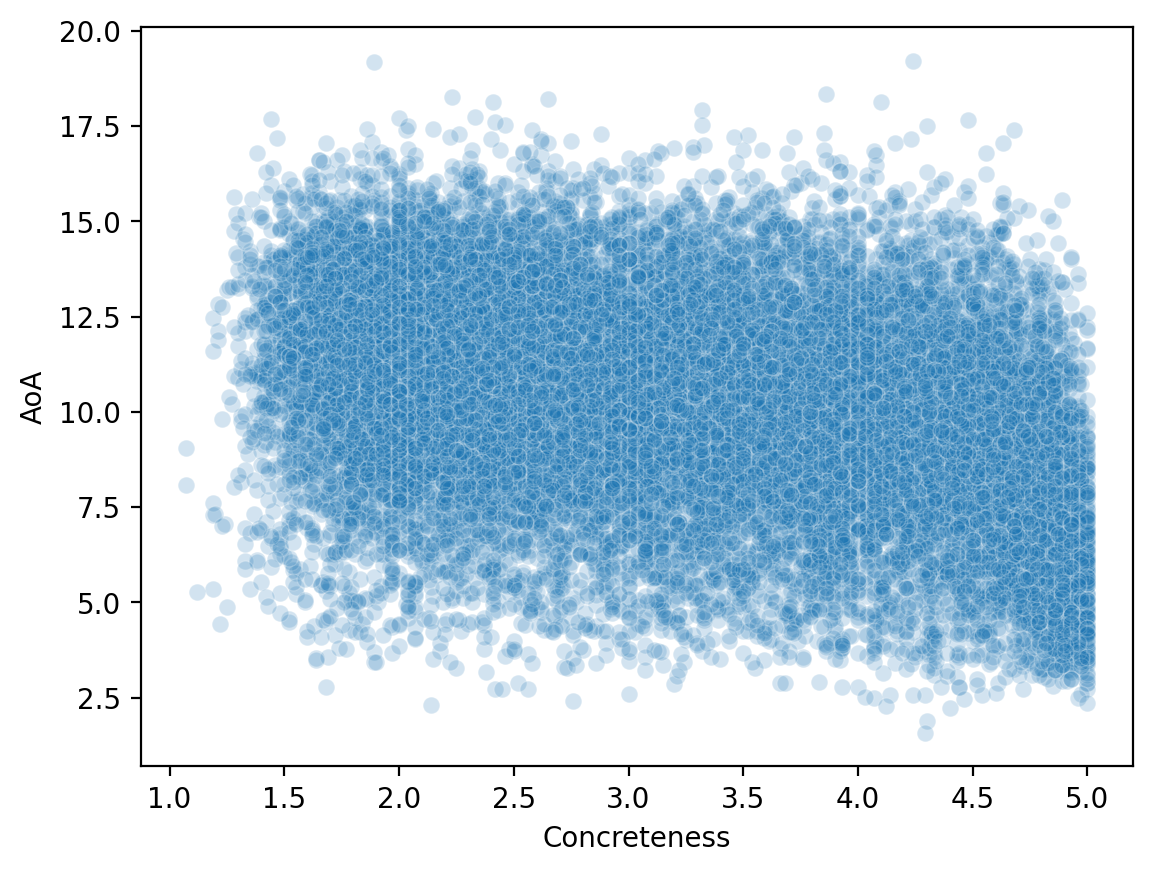

In [64]:
sns.scatterplot(data = df_merged, x = 'Concreteness',
                y = 'AoA', alpha = .2 );

## Przekształcanie danych

> **Przekształcanie danych** polega na przekształcaniu ich z jednego formatu (np. "szerokiego") do innego (np. "długiego"), aby uczynić je bardziej podatnymi na wizualizację i analizę.

Często musimy **uporządkować** nasze dane.

### Czym są uporządkowane dane?

**Porządkowanie danych** to szczególny sposób formatowania danych, w którym:

1. Każda zmienna tworzy kolumnę (np. `GDP`).
2. Każda obserwacja tworzy wiersz (np. `kraj`).
3. Każdy typ jednostki obserwacji tworzy tabelę (**dane tabelaryczne**!).

Pierwotnie opracowany przez Hadleya Wickhama, twórcę `tidyverse` w R.

### Uporządkowane vs. "nieuporządkowane" dane

Zobaczmy teraz kilka przykładów **uporządkowanych** vs. **nieuporządkowanych** danych.

Należy o tym pamiętać:

- Wszystkie te zbiory danych zawierają **te same informacje**, tylko w różnych **formatach**.
- „Nieuporządkowane” dane mogą być przydatne do innych celów, np. do prezentacji w artykule.
- Kluczowym celem uporządkowanych danych jest to, że **każdy wiersz reprezentuje obserwację**.

#### Uporządkowane dane

**Pytanie:**: Dlaczego te dane są uważane za uporządkowane?

In [65]:
df_tidy = pd.read_csv("data/wrangling/tidy.csv")
df_tidy

,ppt,condition,rt
0,john,Congruent,200
1,john,Incongruent,250
2,mary,Congruent,178
3,mary,Incongruent,195


#### Nieuporządkowane dane 1

**Pytanie:**: Dlaczego te dane *nie* są uważane za uporządkowane?

In [66]:
df_messy1 = pd.read_csv("data/wrangling/messy1.csv")
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


#### Nieuporządkowane dane 2

**Pytanie:**: Dlaczego te dane *nie* są uważane za uporządkowane?

In [67]:
df_messy2 = pd.read_csv("data/wrangling/messy2.csv")
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


### Uporządkowanie danych

Na szczęście, `pandas` umożliwia przekształcenie "nieuporządkowanego" `DataFrame` w **uporządkowany**.

Kluczowa funkcja to: `pandas.melt`.

```python
pd.melt(df, ### dane
        id_vars = [...], ### jakie jest ID kolumny?
        var_name = ..., ### nazwa dla zmiennej grupującej po kolumnach
        value_name = ..., ### nazwa wartości, jaką przyjmuje ta zmienna
```

Jeśli wydaje się to **abstrakcyjne**, nie martw się - stanie się jaśniejsze dzięki przykładom!


#### Zastosujmy `pd.melt`

- Zacznijmy od naszej pierwszej niechlujnej `DataFrame`.
- Posiada kolumny dla każdego `ppt`, które zawierają informacje o `rt`.

In [68]:
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


In [69]:
pd.melt(df_messy1, id_vars = 'condition', ### condition jest ID zmiennej
       var_name = 'ppt', ### now wiersz dla kazdej obserwacji ppt
       value_name = 'rt') ### etykieta dla zmiennej 

,condition,ppt,rt
0,Congruent,john,200
1,Incongruent,john,250
2,Congruent,mary,178
3,Incongruent,mary,195


#### Twoja kolej!

Spróbuj użyć `pd.melt`, aby przekształcić `df_messy2` w **schludną** `DataFrame`.

**Wskazówka**: Pomyśl o istniejącej strukturze `DataFrame` - jak dane są pogrupowane - i jakie byłyby `id_vars`.

In [70]:
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


In [71]:
### Twój kod tutaj

### Prawdziwy zestaw danych

Teraz przejdziemy do prawdziwego zestawu danych, który Timothy Lee, twórca [Full Stack Economics](https://www.fullstackeconomics.com/), skompilował i udostępnił.

In [72]:
df_work = pd.read_csv("data/viz/missing_work.csv")
df_work.head(5)

,Year,Child care problems,Maternity or paternity leave,Other family or personal obligations,Illness or injury,Vacation,Month
0,2012,18,313,246,899,1701,10
1,2012,35,278,230,880,1299,11
2,2012,13,245,246,944,1005,12
3,2013,14,257,250,1202,1552,1
4,2013,27,258,276,1079,1305,2


#### Twoja kolej!

Czy ten zbiór danych jest uporządkowany? Jak moglibyśmy go uporządkować, jeśli nie - tj. gdybyśmy chcieli, aby każdy *wiersz* był pojedynczą obserwacją odpowiadającą jednemu z *powodów* braku pracy?

In [ ]:
### Twój kod tutaj

#### Solution

In [63]:
df_melted = pd.melt(df_work, id_vars = ['Year', 'Month'],
                    var_name = "Reason",
                    value_name = "Days Missed")
df_melted.head(2)

,Year,Month,Reason,Days Missed
0,2012,10,Child care problems,18
1,2012,11,Child care problems,35


### Dlaczego uporządkowane dane są przydatne

Na koniec użyjmy tego zestawu danych do odtworzenia wykresu z [FullStackEconomics](https://www.fullstackeconomics.com/).

#### Oryginalny wykres

![title](img/work.png)

#### Twoja kolej!

Jakich narzędzi z `seaborn` można użyć do odtworzenia tego wykresu?

In [76]:
### Twój kod tutaj

In [77]:
# Odkomentuj następującą linię, aby zobaczyć rozwiązanie:
# %load ./solutions/solution7.py

## Transformacje danych

Czasami spotykamy się z sytuacją, w której mamy problemy ze skośnymi rozkładami lub po prostu chcemy przekształcić, przekodować lub wykonać dyskretyzację. Przyjrzyjmy się kilku najpopularniejszym metodom transformacji.

Po pierwsze, standaryzacja (znana również jako normalizacja):

- Podejście **$Z$-score** - procedura standaryzacji, wykorzystująca wzór: $z=\frac{x-\mu}{\sigma}$, gdzie $\mu$ = średnia, a $\sigma$ = odchylenie standardowe. Wyniki $Z$ są również znane jako wyniki standaryzowane; są to wyniki (lub wartości danych), którym przypisano wspólny *standard*. Ten standard to średnia równa zero i odchylenie standardowe równe 1.

- Podejście **minmax** - Alternatywnym podejściem do normalizacji (lub standaryzacji) wyniku $Z$ jest tak zwane skalowanie MinMax (często nazywane również po prostu „normalizacją” - co jest częstą przyczyną niejednoznaczności). W tym podejściu dane są skalowane do ustalonego zakresu - zwykle od 0 do 1. Kosztem posiadania tego ograniczonego zakresu - w przeciwieństwie do normalizacji - jest to, że otrzymamy mniejsze odchylenia standardowe, które mogą tłumić efekt wartości odstających. Jeśli chcesz wykonać skalowanie MinMax - po prostu odejmij wartość minimalną i podziel ją przez zakres: $(x-min)/(max-min)$.

Aby rozwiązać problemy z bardzo skośnymi rozkładami, możemy również użyć kilku rodzajów prostych przekształceń:

- $log$
- $log+1$
- $sqrt$
- $x^2$
- $x^3$

***Ćwiczenie:*** Znormalizuj dochody i przedstaw przekształcony rozkład dochodów na wykresie pudełkowym.

In [78]:
dochody = pd.read_csv("data/models/income.csv")
dochody.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


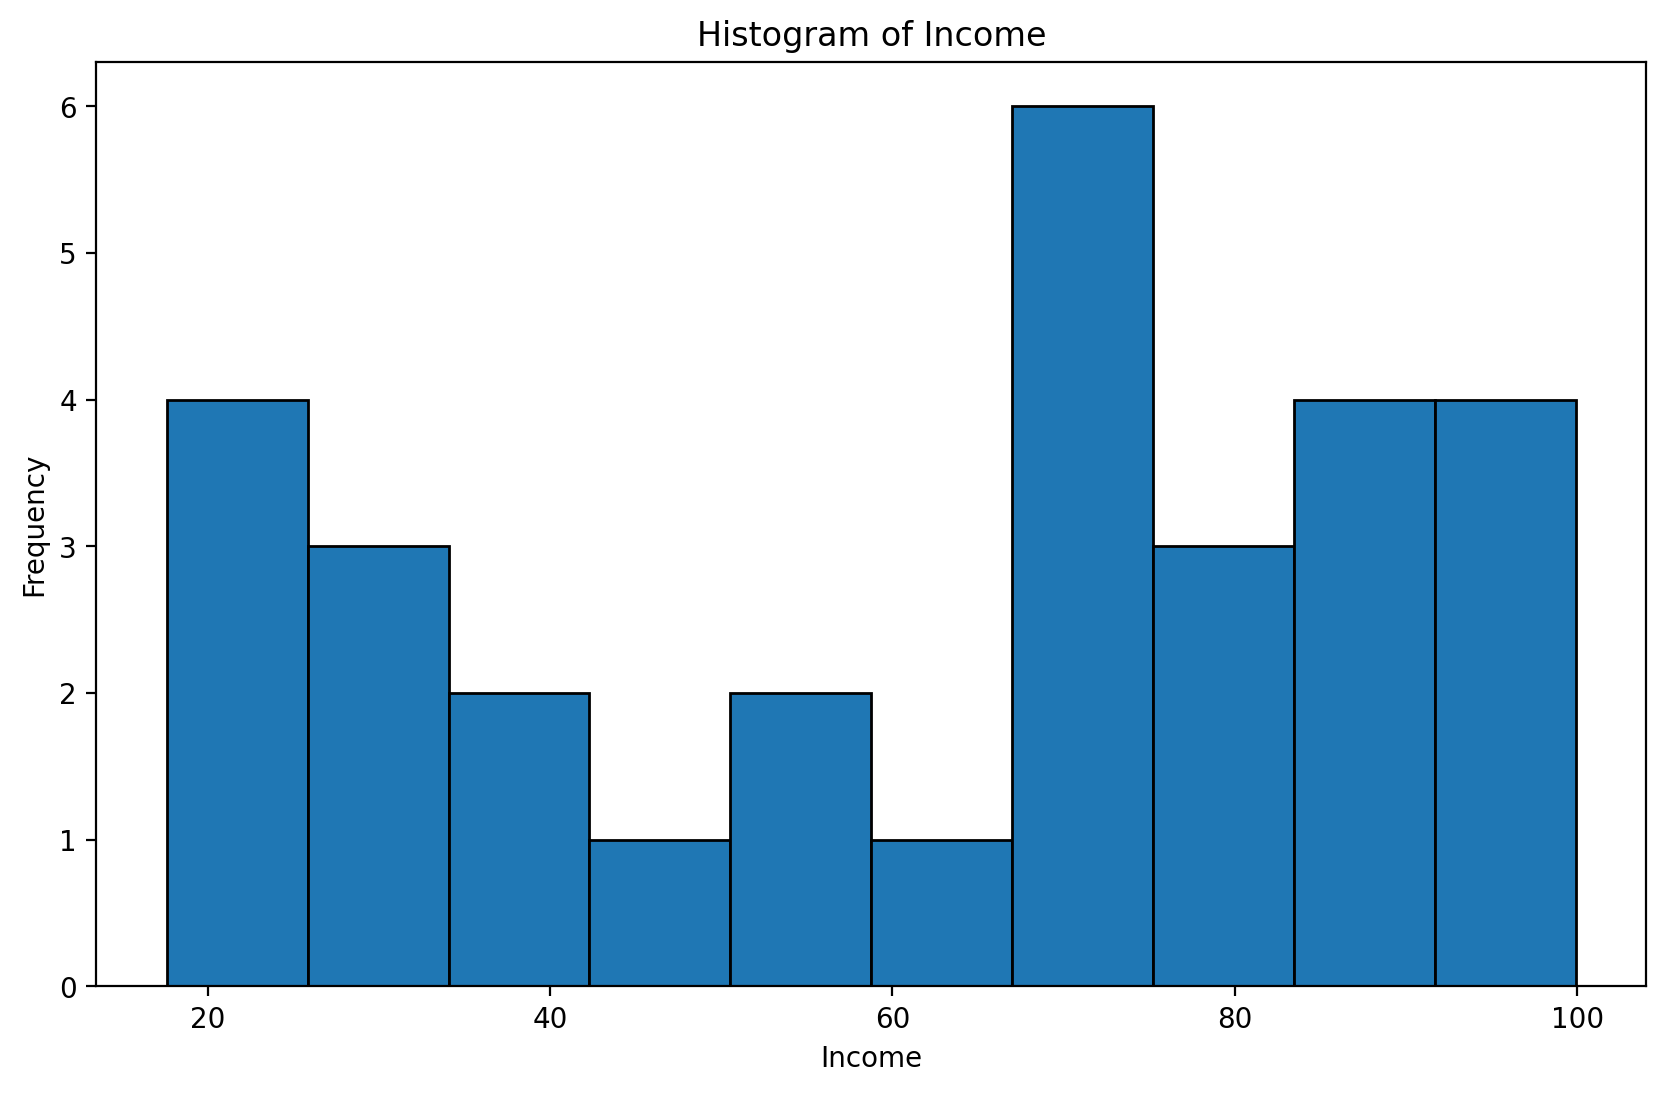

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(dochody['Income'], edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Twój kod tutaj

## Kategoryzacja danych

Czasami po prostu chcielibyśmy wykonać tak zwaną procedurę „binningu”, aby móc analizować nasze dane kategorialne, porównywać kilka zmiennych kategorialnych, konstruować modele statystyczne itp. Dzięki funkcji „binning” możemy przekształcić zmienne ilościowe w kategoryczne za pomocą kilku metod:

- **quantile** - automatyczne kategoryzowanie danych według kwantyla (%) jego rozkładu

- **equal** - binning w celu uzyskania stałej długości przedziałów (np. co 100 zł)

- **pretty** - kompromis między 2 wymienionymi powyżej (złoty środek)

- **kmeans** - kategoryzacja za pomocą algorytmu klastrowania danych metodą K-średnich

- **bclust** - kategoryzacja za pomocą algorytmu klasteryzacji workowej

**Ćwiczenie** Korzystając z podejścia kwantylowego, wykonaj binning zmiennej „Dochód”. Wskazówka: w Pandas mamy gotową do wykorzystania funkcję [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)

In [84]:
# Twój kod tutaj

## Podsumowanie

To było wprowadzenie do **data wranglingu**.

- Jak wspomniano, porządkowanie danych jest niezwykle ważnym tematem - i mogłoby stanowić cały przedmiot na tych studiach podyplomowych.
- Ale dzisiaj skupiliśmy się na:
 - Identyfikacji i usuwaniu brakujących danych.  
   - Łączeniu zestawów danych.  
   - Porządkowaniu danych.